## Laptop price (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing the main characteristics of a dataset. In the context of "Laptop Price EDA," this likely involves analyzing a dataset related to laptop prices.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [148]:
df = pd.read_csv('Data/laptops.csv')

In [149]:
df

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566
...,...,...,...,...,...,...,...,...,...,...,...
995,hp,Gaming,16.242566,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10,4.685053,40254.533272
996,Microsoft,WorkStation,17.450809,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS,3.934182,57272.697780
997,lenevo,NoteBook,13.761288,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10,4.047468,48214.606894
998,Asus,UltraBook,11.038000,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS,3.669825,58926.553683


#### Data Cleaning and Preprocessing:
**Missing Values:

*Check for missing values in each column.
*Decide on a strategy for handling missing data (e.g., imputation or removal)


In [150]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [152]:
df.shape

(1000, 11)

In [153]:
df.isna().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### Exploratory Data Analysis (EDA):
**Descriptive Statistics:

*Calculate basic statistics (mean, median, standard deviation) for numerical columns.
*Explore the distribution of categorical variables.

In [155]:
df.describe()

,Inches,Weight,Price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


In [156]:
# 1. Type of Laptop
type_count = df['TypeOfLaptop'].value_counts().reset_index()
type_count.columns = ['TypeOfLaptop', 'Count']

fig = px.bar(type_count,
             x='TypeOfLaptop', 
             y='Count', 
             title='Distribution of Laptop Types', 
             labels={'Count': 'Number of Laptops', 'TypeOfLaptop': 'Type of Laptop'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [157]:
# 2. Screen Resolution
resolution_count = df['ScreenResolution'].value_counts().reset_index()
resolution_count.columns = ['ScreenResolution', 'Count']

fig = px.bar(resolution_count,
             x='ScreenResolution',
             y='Count', 
             title='Distribution of Screen Resolutions', 
             labels={'Count': 'Number of Laptops', 'ScreenResolution': 'Screen Resolution'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [158]:
# 3. CPU
cpu_count = df['Cpu'].value_counts().reset_index()
cpu_count.columns = ['Cpu', 'Count']

fig = px.bar(cpu_count,
             x='Cpu', 
             y='Count', 
             title='Distribution of CPU Types', 
             labels={'Count': 'Number of Laptops', 'Cpu': 'CPU Type'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [159]:
# 4. GPU
gpu_count = df['Gpu'].value_counts().reset_index()
gpu_count.columns = ['Gpu', 'Count']

fig = px.bar(gpu_count,
             x='Gpu',
             y='Count',
             title='Distribution of GPU Types',
             labels={'Count': 'Number of Laptops', 'Gpu': 'GPU Type'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [160]:
# 5. Operating System
os_count = df['OpSys'].value_counts().reset_index()
os_count.columns = ['OpSys', 'Count']

fig = px.bar(os_count, 
             x='OpSys', 
             y='Count', 
             title='Distribution of Operating Systems', 
             labels={'Count': 'Number of Laptops', 'OpSys': 'Operating System'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

#### Data Visualization:

*Create visualizations to understand the distribution of laptops across - different categories (e.g., company, type, operating system).
*Plot correlations between numerical variables. Visualize the distribution of price

In [161]:
# Company Distribution
company_distribution = df['CompanyName'].value_counts().reset_index()
company_distribution.columns = ['CompanyName', 'Count']

fig = px.bar(company_distribution, 
             x='CompanyName', 
             y='Count', 
             title='Distribution of Laptops by Company', 
             labels={'Count': 'Number of Laptops', 'CompanyName': 'Company'})

fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

C:\Users\shimu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



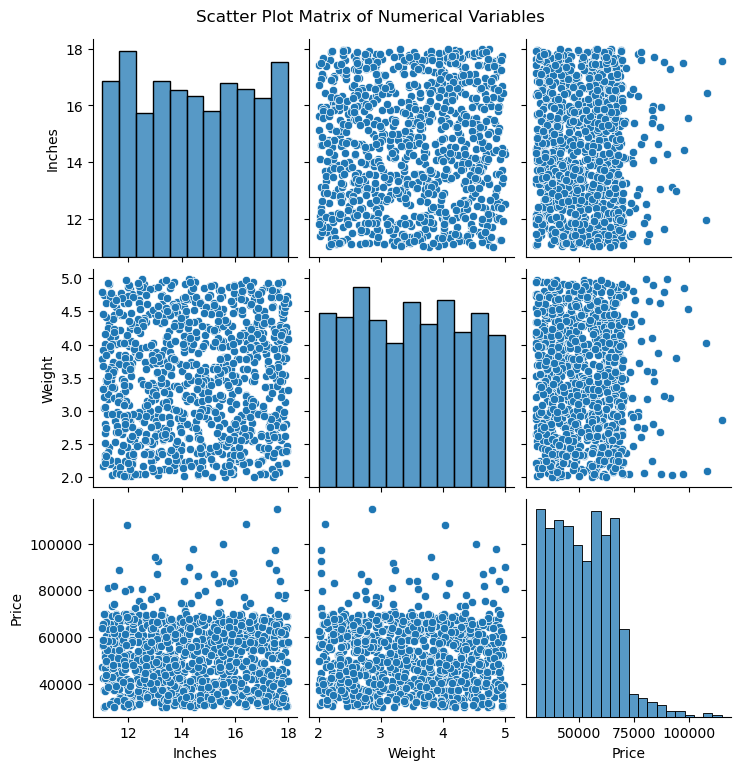

In [162]:
# Correlations Between Numerical Variables
# Scatter Plot Matrix

sns.pairplot(df[['Inches', 'Ram', 'Weight', 'Price']])
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

In [163]:
# Visualize the Distribution of Prices

# Price Distribution
fig = px.histogram(df,
                   x='Price', 
                   title='Distribution of Laptop Prices', 
                   labels={'Price': 'Laptop Price'})
fig.show()

In [164]:
# Scatter Plot: Price vs. Weight
fig = px.scatter(df, 
                 x='Weight',
                 y='Price', 
                 title='Scatter Plot: Weight vs. Price', 
                 labels={'Weight': 'Laptop Weight', 'Price': 'Laptop Price'})
fig.show()

In [165]:
# Scatter Plot: Price vs. Inches
fig = px.scatter(df, 
                 x='Inches', 
                 y='Price', 
                 title='Scatter Plot: Inches vs. Price', 
                 labels={'Inches': 'Screen Size (Inches)', 'Price': 'Laptop Price'})
fig.show()

#### Key Findings:
**Popular Laptop Types:

*Identify the most common types of laptops in the dataset

In [166]:
# Histogram for screen sizes
fig = px.histogram(df, 
                   x='Inches', 
                   title='Distribution of Screen Sizes', 
                   labels={'Inches': 'Screen Size (Inches)'})
fig.show()

#### Data Preprocessing:
*Check for missing values and handle them (either by removing or imputing).
*Convert categorical variables like "TypeOfLaptop," "Cpu," "OpSys" into numerical representations using techniques like one-hot encoding.
*Normalize or standardize numerical features if needed.

In [167]:
# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, 
                            columns=['TypeOfLaptop', 'Cpu', 'OpSys'], 
                            drop_first=True)

In [168]:
# Convert 'Ram' to numeric
df_encoded['Ram'] = df_encoded['Ram'].astype(str).str.extract('(\d+)').astype(float, errors='ignore')

# Convert 'Memory' to numeric (assuming you want to extract the numeric part)
df_encoded['Memory'] = df_encoded['Memory'].astype(str).str.extract('(\d+)').astype(float)
# Assuming 'df_encoded' includes numerical features you want to normalize
numerical_features = ['Inches', 'Ram', 'Weight', 'Price']  # Update this list

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

#### Data Splitting:
*Split your dataset into training and testing sets. This is essential to evaluate your model's performance.

In [169]:
# Assuming 'df_encoded' is your preprocessed DataFrame
# Define features (X) and target variable (y)

X = df_encoded.drop('Price', axis=1)  # Features
y = df_encoded['Price']  # Target variable

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (800, 37) Target: (800,)
Testing set - Features: (200, 37) Target: (200,)


#### Feature Selection:
*Identify the features that are most relevant for predicting laptop prices. You can use techniques like feature importance, correlation analysis, or dimensionality reduction.

In [170]:
#Assuming 'X_train' and 'y_train' are your training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
print(feature_importance)

                                              Feature  Importance
1                                                 Ram    0.200572
0                                              Inches    0.149746
3                                              Weight    0.147025
2                                              Memory    0.053895
25                                   CompanyName_Dell    0.050299
28                                     CompanyName_hp    0.032920
21                                        OpSys_macOS    0.020785
22                                  CompanyName_Apple    0.016827
31                           ScreenResolution_Full HD    0.016081
36                        Gpu_NVIDIA GeForce GTX 1650    0.015773
30                                ScreenResolution_4K    0.015045
4                        TypeOfLaptop_Business Laptop    0.014632
35                         Gpu_Intel Iris Xe Graphics    0.013667
18                                        OpSys_No OS    0.013575
33  Screen

#### Correlation Analysis:
*Use correlation coefficients to identify relationships between features and the target variable.

In [171]:
# Select only numeric columns
numeric_columns = df_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

          Inches       Ram    Memory    Weight     Price
Inches  1.000000 -0.014286 -0.072276  0.037982 -0.012535
Ram    -0.014286  1.000000  0.011465 -0.039935  0.063615
Memory -0.072276  0.011465  1.000000 -0.023323  0.060936
Weight  0.037982 -0.039935 -0.023323  1.000000 -0.024256
Price  -0.012535  0.063615  0.060936 -0.024256  1.000000


#### Recursive Feature Elimination (RFE):

*Use RFE with a model (e.g., linear regression) to recursively remove the least important features.

In [172]:
# Assuming 'X_train' and 'y_train' are your training data
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)

#### Dimensionality Reduction:
*Use techniques like Principal Component Analysis (PCA) to reduce dimensionality.

In [173]:
# Assuming 'X_train' is your training data
pca = PCA(n_components=len(X_train.columns))
X_train_pca = pca.fit_transform(X_train)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[9.99805886e-01 2.87024462e-05 2.68657359e-05 2.65425173e-05
 9.19152264e-06 6.11876572e-06 5.87569613e-06 5.35830622e-06
 5.19050646e-06 5.10303374e-06 4.95805716e-06 4.82772375e-06
 4.65495304e-06 4.50089078e-06 4.38255418e-06 3.88824972e-06
 3.60326582e-06 3.42062573e-06 3.31533068e-06 3.11931026e-06
 3.05995729e-06 2.96846656e-06 2.92949680e-06 2.71063064e-06
 2.67087335e-06 2.64987292e-06 2.60060774e-06 2.56871050e-06
 2.45975854e-06 2.38536868e-06 2.27378511e-06 2.15097757e-06
 1.04911337e-06 7.54533206e-07 7.04973491e-07 3.06307204e-07
 2.51164304e-07]


#### Model Selection:
**Choose a machine learning algorithm. Common algorithms for regression tasks (like predicting prices) include Linear Regression, Decision Trees, Random Forests, and Gradient Boosting.
**The Random Forest Regressor appears to have the lowest mean MSE among the models, making it the best-performing model based on the cross-validation results.

In [174]:
# List of models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR()
]

# Evaluate models using cross-validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    print(f"{model.__class__.__name__}: Mean MSE: {np.mean(-scores)}")

# Train and evaluate the best-performing model on the test set
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE for the best model: {test_mse}")

LinearRegression: Mean MSE: 0.973158995390142
DecisionTreeRegressor: Mean MSE: 1.466912942031452
RandomForestRegressor: Mean MSE: 0.8117912334385557
GradientBoostingRegressor: Mean MSE: 0.8699491081893086
SVR: Mean MSE: 1.0010309461884157
Test MSE for the best model: 0.8883650246543651


#### Model Training:
**Train your selected model using the training dataset.

In [175]:
# Instantiate the Random Forest Regressor with the best hyperparameters
best_model = RandomForestRegressor(random_state=42)

# Train the model using the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE for the best model: {test_mse}")


# Create a DataFrame to hold actual and predicted prices
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

# Create a scatter plot
fig = px.scatter(results_df, x='Actual', y='Predicted', title='Actual vs Predicted Prices')
fig.update_layout(xaxis_title='Actual Prices', yaxis_title='Predicted Prices')
fig.show()

Test MSE for the best model: 0.8883650246543651


In [145]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Evaluate performance metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
r_squared = r2_score(y_test, test_predictions)

# Create a DataFrame for visualization
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

# Scatter plot
fig = px.scatter(evaluation_df, x='Actual', y='Predicted', title='Actual vs Predicted Prices')
fig.update_layout(xaxis_title='Actual Prices', yaxis_title='Predicted Prices')
fig.show()

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")


Mean Absolute Error (MAE): 0.7793732985875605
Mean Squared Error (MSE): 0.8883650246543651
R-squared (R2): 0.17054512585754167


In [176]:
# Define the hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Regressor
base_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the entire training set
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Visualize actual vs. predicted prices
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
fig = px.scatter(evaluation_df, x='Actual', y='Predicted', title='Actual vs Predicted Prices (Tuned Model)')
fig.update_layout(xaxis_title='Actual Prices', yaxis_title='Predicted Prices')
fig.show()

# Print evaluation metrics for the tuned model
tuned_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE for the tuned model: {tuned_mse}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Test MSE for the tuned model: 0.884351344283537
